In [1]:
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

tqdm.pandas()

In [2]:
from Data.DataModels.datasetFromSequences import SequenceDatasetCUDA
from Data.DataModels.dataModule import DataModule
from Models.modelLSTM import LSTMModel
from Models.modelMAMBA import MAMBAModel
from Models.modelTransformer import TransformerModel
from Models.moduleAdamW import AdamWModule
from Data.preprocessingChangeInPrice import PreprocessChangeInPrice

In [3]:
N_EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 0.0001
SEQUENCE_LENGTH = 120

VAL_PERC = .1
TEST_PERC = .1
DATE_COLUMN = 'Date'
COLUMN_TO_SHIFT = 'Close'

In [4]:
nvda_data = PreprocessChangeInPrice(
    csv_path = 'Data/CSV/WIKI-NVDA.csv',
    date_column = DATE_COLUMN ,
    column_to_shift = COLUMN_TO_SHIFT,
    use_scaler = False,
    sequence_length = SEQUENCE_LENGTH,
    val_percentage = VAL_PERC,
    test_percentage = TEST_PERC
)

nvda_data.preprocess()

Getting the change of price in a day...


  0%|          | 0/4825 [00:00<?, ?it/s]

Getting the change of price in a day...


  0%|          | 0/4825 [00:00<?, ?it/s]

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume', 'Previous', 'Previous_Change', 'Future',
       'Future_Change'],
      dtype='object')
Transforming date column to day_of_week, day_of_month, week_of_year and year columns...


  0%|          | 0/4825 [00:00<?, ?it/s]

Current shape after transformation of date column:  (4825, 12)
Current train and test shapes:  (3860, 12) (483, 12)
Creating sequences from pandas DataFrame...


  0%|          | 0/3740 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

  0%|          | 0/363 [00:00<?, ?it/s]

Train shape:  (120, 12)
Val shape:  (120, 12)
Test shape:  (120, 12)


In [5]:
sbux_data = PreprocessChangeInPrice(
    csv_path = 'Data/CSV/WIKI-SBUX.csv',
    date_column = DATE_COLUMN ,
    column_to_shift = COLUMN_TO_SHIFT,
    use_scaler = False,
    sequence_length = SEQUENCE_LENGTH,
    val_percentage = VAL_PERC,
    test_percentage = TEST_PERC
)

sbux_data.preprocess()

Getting the change of price in a day...


  0%|          | 0/6485 [00:00<?, ?it/s]

Getting the change of price in a day...


  0%|          | 0/6485 [00:00<?, ?it/s]

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume', 'Previous', 'Previous_Change', 'Future',
       'Future_Change'],
      dtype='object')
Transforming date column to day_of_week, day_of_month, week_of_year and year columns...


  0%|          | 0/6485 [00:00<?, ?it/s]

Current shape after transformation of date column:  (6485, 12)
Current train and test shapes:  (5188, 12) (649, 12)
Creating sequences from pandas DataFrame...


  0%|          | 0/5068 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/529 [00:00<?, ?it/s]

Train shape:  (120, 12)
Val shape:  (120, 12)
Test shape:  (120, 12)


In [6]:
msft_data = PreprocessChangeInPrice(
    csv_path = 'Data/CSV/WIKI-MSFT.csv',
    date_column = DATE_COLUMN ,
    column_to_shift = COLUMN_TO_SHIFT,
    use_scaler = False,
    sequence_length = SEQUENCE_LENGTH,
    val_percentage = VAL_PERC,
    test_percentage = TEST_PERC
)

msft_data.preprocess()

Getting the change of price in a day...


  0%|          | 0/8076 [00:00<?, ?it/s]

Getting the change of price in a day...


  0%|          | 0/8076 [00:00<?, ?it/s]

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume', 'Previous', 'Previous_Change', 'Future',
       'Future_Change'],
      dtype='object')
Transforming date column to day_of_week, day_of_month, week_of_year and year columns...


  0%|          | 0/8076 [00:00<?, ?it/s]

Current shape after transformation of date column:  (8076, 12)
Current train and test shapes:  (6460, 12) (809, 12)
Creating sequences from pandas DataFrame...


  0%|          | 0/6340 [00:00<?, ?it/s]

  0%|          | 0/687 [00:00<?, ?it/s]

  0%|          | 0/689 [00:00<?, ?it/s]

Train shape:  (120, 12)
Val shape:  (120, 12)
Test shape:  (120, 12)


In [7]:

nvda_dataset = SequenceDatasetCUDA(nvda_data.test_sequences)

In [8]:
lstm_stock_model = AdamWModule.load_from_checkpoint(
    'Checkpoints/stock-price/best_models/lstm-stock-checkpoint.ckpt',
    n_features = nvda_data.train_sequences[0][0].shape[1]
)

transformer_stock_model = AdamWModule.load_from_checkpoint(
    'Checkpoints/stock-price/best_models/transformer-stock-checkpoint.ckpt',
    n_features = nvda_data.train_sequences[0][0].shape[1]
)

mamba_stock_model = AdamWModule.load_from_checkpoint(
    'Checkpoints/stock-price/best_models/mamba-stock-checkpoint.ckpt',
    n_features = nvda_data.train_sequences[0][0].shape[1]
)

/home/agata/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'criterion' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['criterion'])`.


In [9]:
lstm_stock_predictions = []
lstm_stock_labels = []

for item in tqdm(nvda_dataset):
    sequence = item['sequence']
    label = item['label']

    _, output = lstm_stock_model(sequence.unsqueeze(dim = 0))
    lstm_stock_predictions.append(output.item())
    lstm_stock_labels.append(label.item())

  0%|          | 0/363 [00:00<?, ?it/s]

In [10]:

transformer_stock_predictions = []
transformer_stock_labels = []

for item in tqdm(nvda_dataset):
    sequence = item['sequence']
    label = item['label']

    _, output = transformer_stock_model(sequence.unsqueeze(dim = 0))
    transformer_stock_predictions.append(output.item())
    transformer_stock_labels.append(label.item())

  0%|          | 0/363 [00:00<?, ?it/s]

In [11]:
mamba_stock_predictions = []
mamba_stock_labels = []

for item in tqdm(nvda_dataset):
    sequence = item['sequence']
    label = item['label']

    _, output = mamba_stock_model(sequence.unsqueeze(dim = 0))
    mamba_stock_predictions.append(output.item())
    mamba_stock_labels.append(label.item())

  0%|          | 0/363 [00:00<?, ?it/s]

In [12]:
len(lstm_stock_predictions), len(nvda_data.test_df)

(363, 483)

In [13]:
len(nvda_data.test_df) - SEQUENCE_LENGTH

363

In [14]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(nvda_data.train_df[['close']])

In [15]:
nvda_test_sequences_data = nvda_data.test_df.iloc[SEQUENCE_LENGTH:]
len(nvda_test_sequences_data), len(lstm_stock_predictions)

(363, 363)

In [16]:
nvda_test_sequences_data['date'] = nvda_test_sequences_data[['year', 'month', 'day_of_month']].astype(str).apply('-'.join, axis=1)
nvda_test_sequences_data['date'] = pd.to_datetime(nvda_test_sequences_data['date'])

/tmp/ipykernel_7604/2868374266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_test_sequences_data['date'] = nvda_test_sequences_data[['year', 'month', 'day_of_month']].astype(str).apply('-'.join, axis=1)
/tmp/ipykernel_7604/2868374266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_test_sequences_data['date'] = pd.to_datetime(nvda_test_sequences_data['date'])


In [27]:
transformer_stock_predictions

[0.09883730858564377,
 0.09883731603622437,
 0.09883730858564377,
 0.09883731603622437,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730113506317,
 0.09883730858564377,
 0.09883730113506317,
 0.09883730858564377,
 0.09883730113506317,
 0.09883731603622437,
 0.09883730858564377,
 0.09883731603622437,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730113506317,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730113506317,
 0.09883730858564377,
 0.09883731603622437,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730858564377,
 0.09883731603622437,
 0.09883731603622437,
 0.09883731603622437,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730858564377,
 0.09883731603622437,
 0.09883730858564377,
 0.09883730858564377,
 0.09883730858564377,
 0.09883731603622437,
 0.09883731603622437,
 0.09883730858564377,
 0.09883730858564377,
 0.09883731603622437,
 0.09883730858564377,
 0.0988373

In [17]:
nvda_test_sequences_data.head()

,day_of_week,day_of_month,week_of_year,month,year,open,high,low,volume,previous_change,future_change,close,date
4462,4,14,41,10,2016,66.15,66.60,65.60,8265851.0,0.64,-0.38,65.99,2016-10-14
4463,0,17,42,10,2016,65.98,66.60,65.52,4883160.0,-0.38,1.00,65.61,2016-10-17
4464,1,18,42,10,2016,66.52,66.99,66.25,6734274.0,1.00,-0.14,66.61,2016-10-18
4465,2,19,42,10,2016,66.16,66.78,65.82,4976462.0,-0.14,1.26,66.47,2016-10-19
4466,3,20,42,10,2016,67.25,67.95,66.30,7802072.0,1.26,-0.19,67.73,2016-10-20


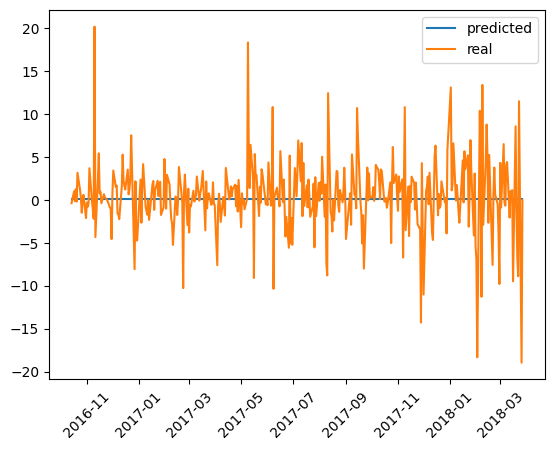

In [18]:
dates = matplotlib.dates.date2num(nvda_test_sequences_data.date.tolist())
plt.plot_date(dates, lstm_stock_predictions, '-', label = 'predicted')
plt.plot_date(dates, lstm_stock_labels, '-', label = 'real')
plt.xticks(rotation=45)
plt.legend()

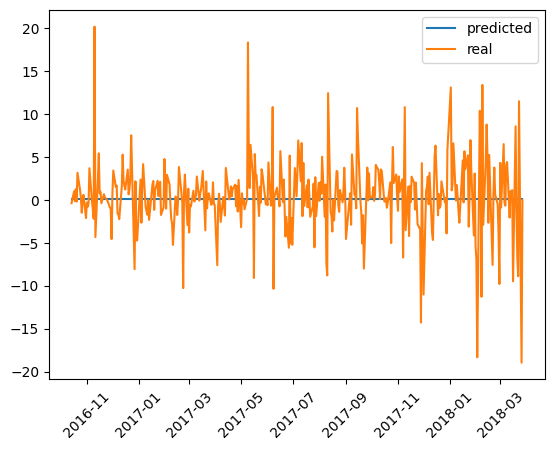

In [19]:
plt.plot_date(dates, transformer_stock_predictions, '-', label = 'predicted')
plt.plot_date(dates, transformer_stock_labels, '-', label = 'real')
plt.xticks(rotation=45)
plt.legend()

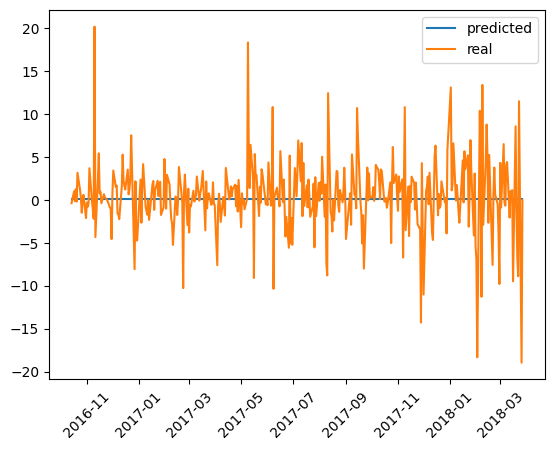

In [20]:
plt.plot_date(dates, mamba_stock_predictions, '-', label = 'predicted')
plt.plot_date(dates, mamba_stock_labels, '-', label = 'real')
plt.xticks(rotation=45)
plt.legend()